In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
MaternalRisk = pd.read_csv('/content/sample_data/Maternal Health Risk Data Set.csv')
MaternalRisk.head(50)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
MaternalRisk.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
MaternalRisk.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
MaternalRisk.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

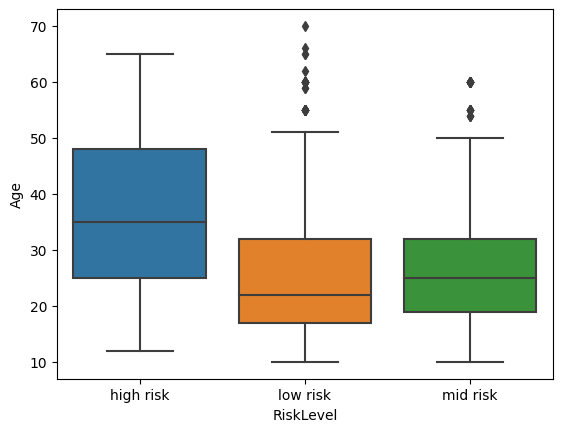

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'Age')
plt.show()

In [ ]:
MaternalRisk['RiskLevel'] = MaternalRisk['RiskLevel'].apply(lambda x:"high risk" if x== 'high risk' else "low risk")
MaternalRisk['RiskLevel'] = MaternalRisk['RiskLevel'].astype('category')
MaternalRisk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
MaternalRisk['RiskLevel'] = MaternalRisk['RiskLevel'].apply(lambda x: 1 if x== 'high risk' else 0)
MaternalRisk['RiskLevel'] = MaternalRisk['RiskLevel'].astype('category')
MaternalRisk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


<function matplotlib.pyplot.show(close=None, block=None)>

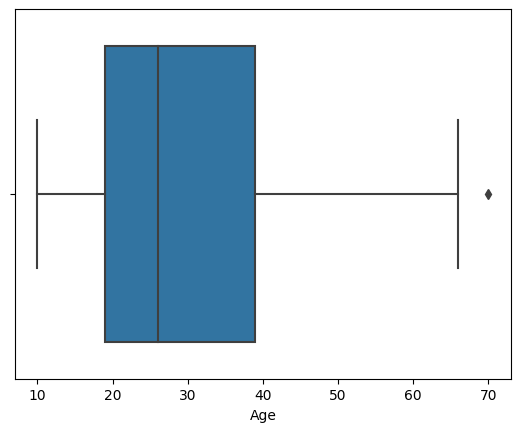

In [ ]:
sns.boxplot(x=MaternalRisk['Age'])
plt.show

<Axes: xlabel='Age', ylabel='Count'>

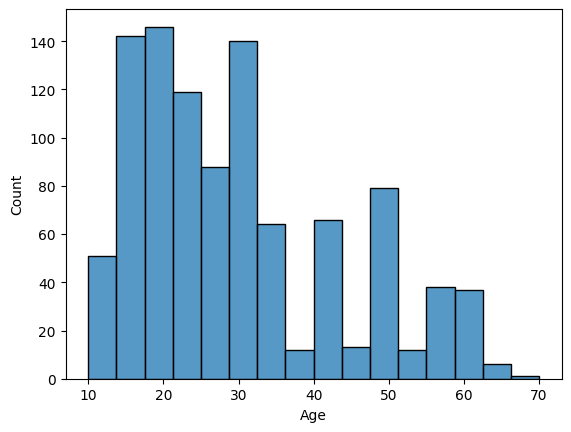

In [ ]:
sns.histplot(data = MaternalRisk, x = 'Age')

<Axes: xlabel='RiskLevel', ylabel='Count'>

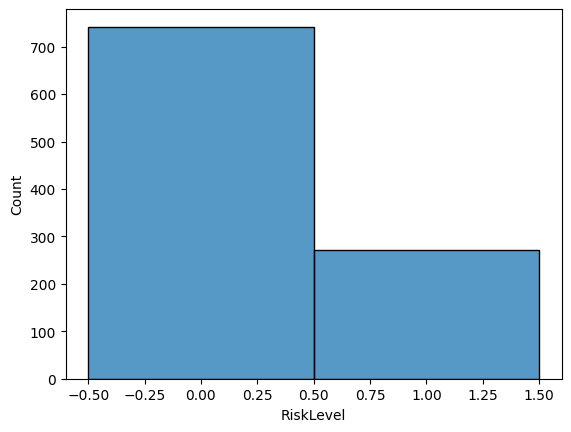

In [ ]:
sns.histplot(data = MaternalRisk, x = 'RiskLevel')

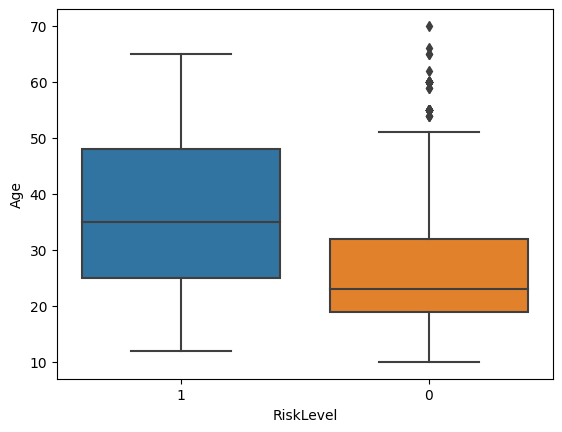

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'Age')
plt.show()

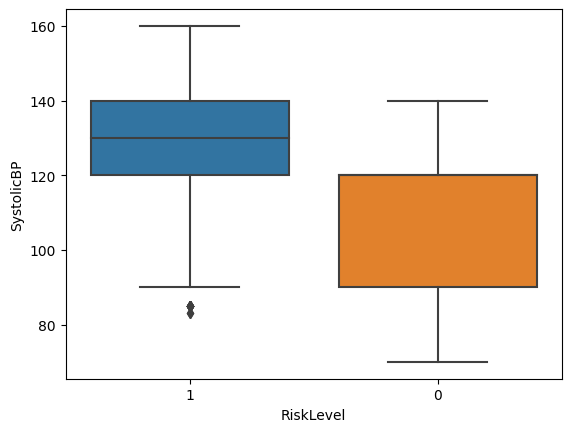

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'SystolicBP')
plt.show()

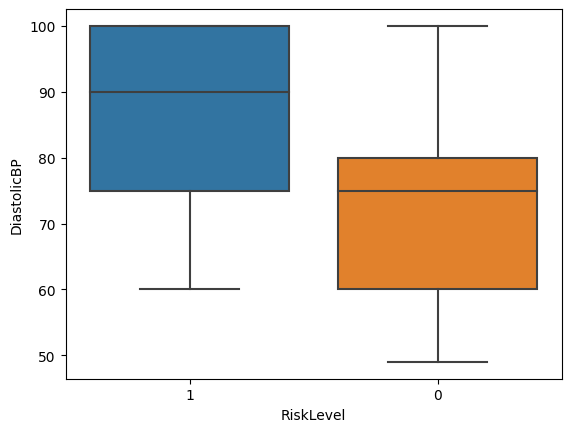

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'DiastolicBP')
plt.show()

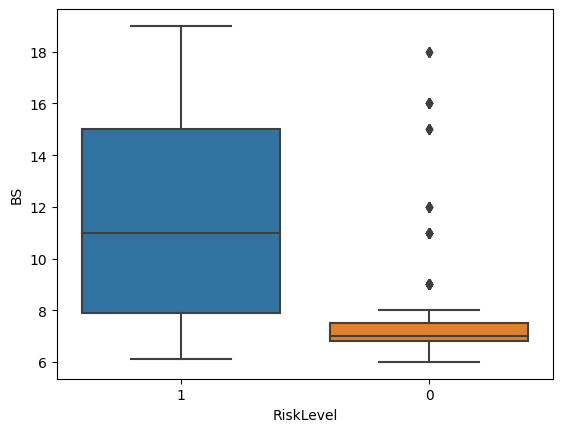

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'BS')
plt.show()

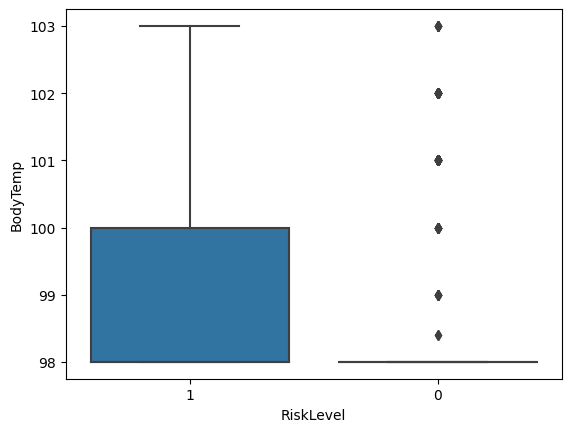

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'BodyTemp')
plt.show()

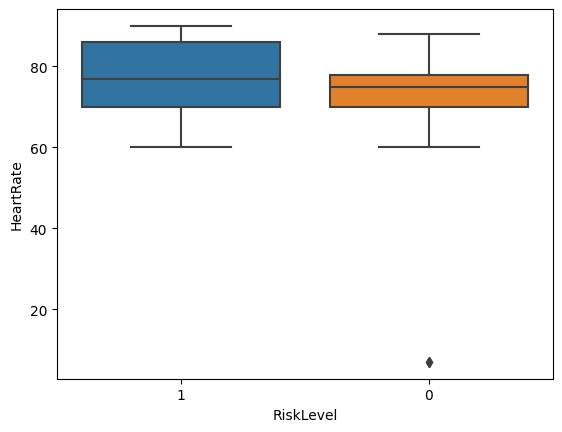

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'HeartRate')
plt.show()

In [ ]:
# Calculate the interquartile range (IQR)
q1 = MaternalRisk['Age'].quantile(0.25)
q3 = MaternalRisk['Age'].quantile(0.75)
iqr = q3 - q1
# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
MaternalRisk = MaternalRisk[(MaternalRisk['Age']>lower_fence)&(MaternalRisk['Age']<upper_fence)]

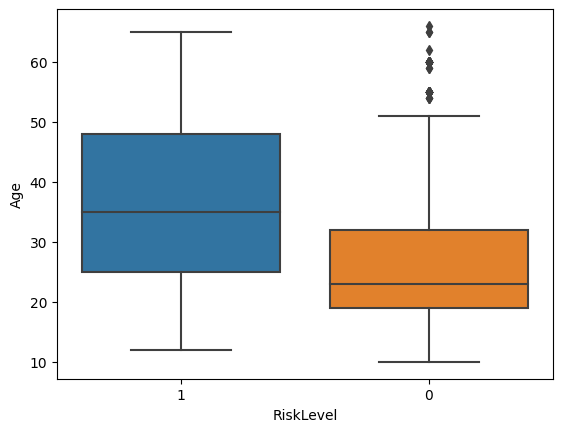

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'Age')
plt.show()

In [ ]:
# Calculate the interquartile range (IQR)
q1 = MaternalRisk['SystolicBP'].quantile(0.25)
q3 = MaternalRisk['SystolicBP'].quantile(0.75)
iqr = q3 - q1
# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
MaternalRisk = MaternalRisk[(MaternalRisk['SystolicBP']>lower_fence)&(MaternalRisk['SystolicBP']<upper_fence)]

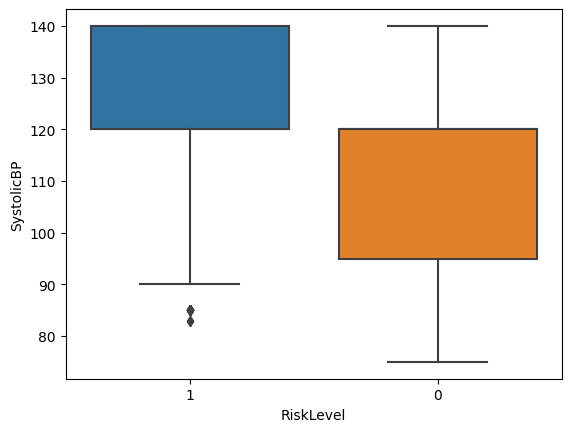

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'SystolicBP')
plt.show()

In [ ]:
# Calculate the interquartile range (IQR)
q1 = MaternalRisk['BS'].quantile(0.25)
q3 = MaternalRisk['BS'].quantile(0.75)
iqr = q3 - q1
# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
MaternalRisk = MaternalRisk[(MaternalRisk['BS']>lower_fence)&(MaternalRisk['BS']<upper_fence)]

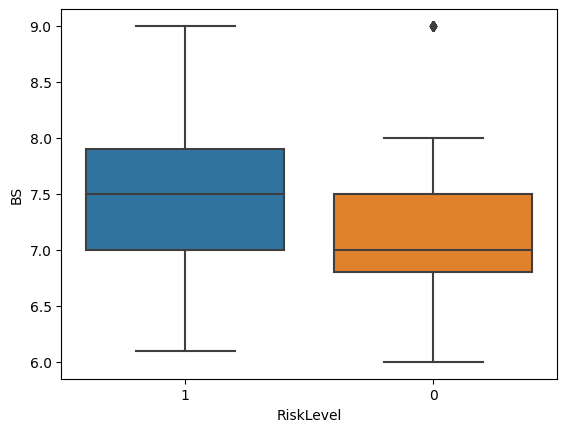

In [ ]:
sns.boxplot(data = MaternalRisk, x = 'RiskLevel', y = 'BS')
plt.show()

In [ ]:
 # Building first model
MaternalRisk_mod1 = MaternalRisk[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'RiskLevel']]
X = MaternalRisk_mod1.drop('RiskLevel', axis=1)
#Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = MaternalRisk_mod1['RiskLevel']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)
# Initialize the logistic regression model
logreg_mod1 = LogisticRegression()
# Fit the model to the training data
logreg_mod1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod1.coef_[0]})
print(coef_df)

      Features  Coefficient
0          Age    -0.010325
1   SystolicBP     0.867847
2  DiastolicBP     0.577936
3           BS     0.635254
4     BodyTemp     1.005752


In [ ]:
# Predictions on the test data
y_pred = logreg_mod1.predict(X_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Calculating area under receiver operating characteristic curve
y_pred_prob = logreg_mod1.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Accuracy: 0.895397489539749
Area under receiver operating characteric curve (AUROC): 0.8277758970886933


In [ ]:
 # Building first model
MaternalRisk_mod2 = MaternalRisk[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'RiskLevel']]
X = MaternalRisk_mod2.drop('RiskLevel', axis=1)
#Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = MaternalRisk_mod2['RiskLevel']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)
# Initialize the logistic regression model
logreg_mod2 = LogisticRegression()
# Fit the model to the training data
logreg_mod2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod2.coef_[0]})
print(coef_df)

      Features  Coefficient
0          Age    -0.084171
1   SystolicBP     0.573960
2  DiastolicBP     0.298609
3           BS     0.669433


In [ ]:
# Predictions on the test data
y_pred = logreg_mod2.predict(X_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Calculating area under receiver operating characteristic curve
y_pred_prob = logreg_mod2.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Accuracy: 0.899581589958159
Area under receiver operating characteric curve (AUROC): 0.7219871360866621
